In [1]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from sklearn.metrics import *
from tensorflow.keras.models import load_model

In [2]:
model1=load_model("C:\\Users\\Mehmet\\Desktop\\ANACONDA PROJELERİ\\modeller\\mobilenetv10.h5")

In [3]:
veri = ImageDataGenerator(rescale=1./255)
testuzantı=r"C:\Users\Mehmet\Desktop\aero-engine data\val"
test=veri.flow_from_directory(testuzantı,target_size=(224,224),batch_size=1,class_mode='categorical',color_mode='rgb')


Found 52 images belonging to 4 classes.


In [14]:
import os
val_file_path = r'C:\Users\Mehmet\Desktop\Aero-engine_defect-detect_new\labels\val'
val=[]
valfile=[]
for filename in os.listdir(val_file_path):
    filename="\\".join([val_file_path,filename])
    file = open(filename,'r')
    icerik = file.read()
    if len(icerik.splitlines())==1:
        kelimeler = icerik.split()
        if kelimeler[0] == '0':
                valfile.append([1, 0, 0, 0])
        elif kelimeler[0] == '1':
                valfile.append([0, 1, 0, 0])
        elif kelimeler[0] == '2':
                valfile.append([0, 0, 1, 0])
        elif kelimeler[0] == '3':
                valfile.append([0, 0, 0, 1])
    else :
        for satir in icerik.splitlines():
            kelimeler = satir.split()
            if kelimeler[0] == '0':
                valfile.append([1, 0, 0, 0])
            elif kelimeler[0] == '1':
                valfile.append([0, 1, 0, 0])
            elif kelimeler[0] == '2':
                valfile.append([0, 0, 1, 0])
            elif kelimeler[0] == '3':
                valfile.append([0, 0, 0, 1])
        
    val.append(valfile)
    valfile=[]
combined_val = []
for group in val:
    combined_item = [0, 0, 0, 0]
    for sublist in group:
        for i in range(4):
            if combined_item[i]<1:
                combined_item[i] += sublist[i]
    combined_val.append(combined_item)
gercek_np=np.array(combined_val)

In [15]:
predIdx=model1.predict(test)
tahmin_np =(predIdx> 0.4).astype(int)

52/52 [==============================] - 2s 41ms/step


scratch sınıfı için karmaşıklık matrisi :


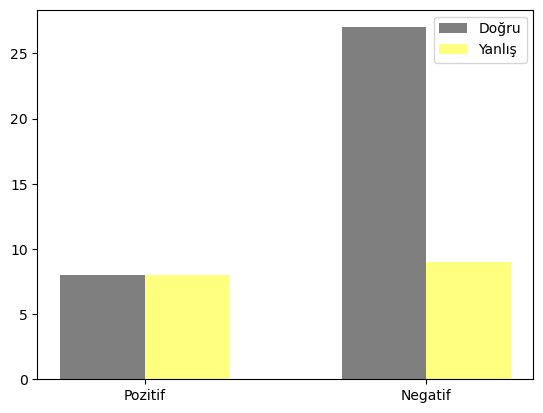

Doğru bilinen pozitifler :8
Yanlış bilinen pozitifler :8
Doğru bilinen negatifler :27
Yanlış bilinen negatifler :9
Başarı oranı : % 67.3076923076923

dirty sınıfı için karmaşıklık matrisi :


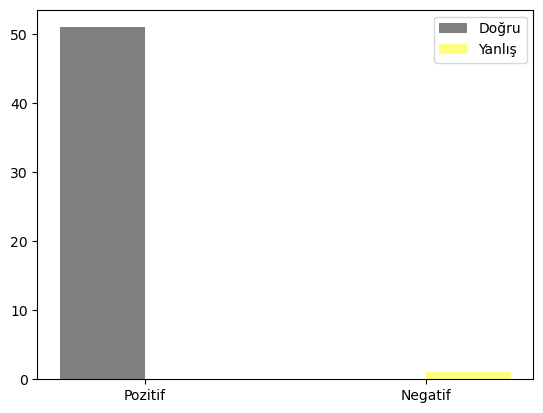

Doğru bilinen pozitifler :51
Yanlış bilinen pozitifler :0
Doğru bilinen negatifler :0
Yanlış bilinen negatifler :1
Başarı oranı : % 98.07692307692308

stain sınıfı için karmaşıklık matrisi :


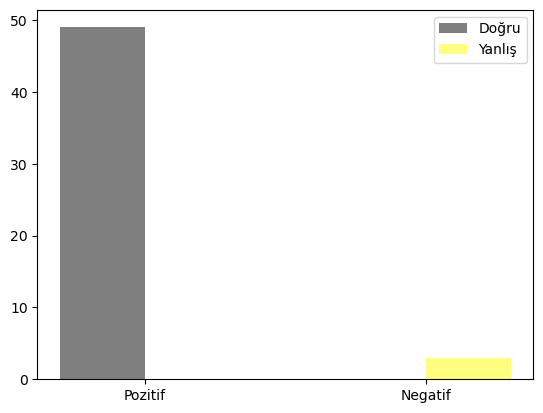

Doğru bilinen pozitifler :49
Yanlış bilinen pozitifler :0
Doğru bilinen negatifler :0
Yanlış bilinen negatifler :3
Başarı oranı : % 94.23076923076923

damage sınıfı için karmaşıklık matrisi :


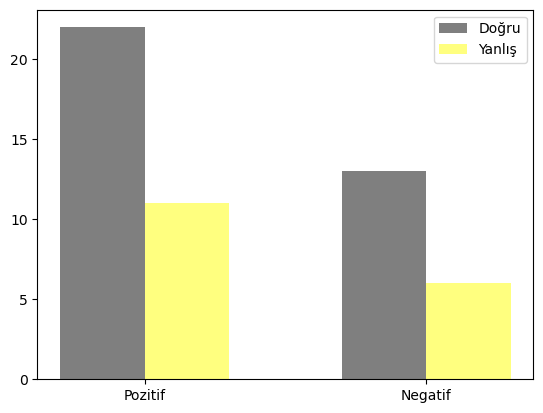

Doğru bilinen pozitifler :22
Yanlış bilinen pozitifler :11
Doğru bilinen negatifler :13
Yanlış bilinen negatifler :6
Başarı oranı : % 67.3076923076923


Total başarı oranı :%81.73076923076923


In [40]:
classes=['scratch','dirty','stain','damage']
tp=0
tn=0
fp=0
fn=0
for i,class_name in enumerate(classes):
    cf = tensorflow.math.confusion_matrix(gercek[:, i],tahmin[:, i])
    print(f'{class_name} sınıfı için karmaşıklık matrisi :')
    tp+=(int(cf[0, 0]))
    tn+=(int(cf[1, 1]))
    fp+=(int(cf[0, 1]))
    fn+=(int(cf[1, 0]))
    true_positives = [cf[0, 0], cf[1, 1]]
    false_positives = [cf[0, 1], cf[1, 0]]
    basari=100*(int(cf[0, 0])+ int(cf[1, 1]))/(int(cf[0, 0])+ int(cf[1, 1])+int(cf[0,1])+int(cf[1,0]))
    labels = ['Pozitif', 'Negatif']
    bar_width = 0.30
    plt.bar(np.arange(len(labels)), true_positives, bar_width, label='Doğru', color='black', alpha=0.5)
    plt.bar(np.arange(len(labels)) + bar_width, false_positives, bar_width, label='Yanlış', color='yellow', alpha=0.5)
    plt.xticks(np.arange(len(labels)) + bar_width / 2, labels)
    plt.legend()
    plt.show()
    print("Doğru bilinen pozitifler :" + str(int(cf[0,0])) + "\n" +
          "Yanlış bilinen pozitifler :" + str(int(cf[0,1])) + "\n" +
          "Doğru bilinen negatifler :" + str(int(cf[1,1])) + "\n" +
          "Yanlış bilinen negatifler :" + str(int(cf[1,0]))+ "\n" +
          "Başarı oranı : % "+str(basari)+ "\n")
print()
print("Total başarı oranı :%"+str(100*(tp+tn)/(tp+tn+fp+fn)))